In [1]:
import pandas as pd
import numpy as np

from konlpy.tag import Okt; okt = Okt()

import matplotlib.pyplot as plt
import networkx as nx
import operator

In [2]:
data = pd.read_csv('신문기사모음(9.17)(utf8).csv')
text = data.body

In [4]:
for i, document in enumerate(text):

    # okt = Okt()
    clean_words = []
    for word in okt.pos(document, stem=True): #어간 추출
        if word[1] not in ['Josa', 'Eomi', 'Punctuation', 'Foreign', 'Suffix' ,'URL', 'Conjunction']: #조사, 어미, 구두점, 외국어/기호, url 제외 
            clean_words.append(word[0])
    # print(clean_words) 
    document = ' '.join(clean_words)
    # print(document) 
    text[i] = document

print(text[0], text[1])

C:\Users\admin\anaconda3\envs\konlp\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


NHN 빅풋 한게임 20년 웹 보드 게임 노하우 접목 스포츠 예측 게임 한게임 승부 예측 출시 하다 11일 밝히다 한게임 승부 예 측은 게임 내 재화 활용 하다 스포츠 경기 결과 예측 하다 보다 게임 실제 전세계 스포츠 경기 데이터 바탕 결과 맞다 힐 경우 배당률 따르다 게임 멀다 제공 다 특히 NHN 빅풋 한게임 웹 보드 게임 개발 및 서비스 노하우 바탕 차별 되다 스포츠 예측 게임 선보이다 먼저 축구 야구 농구 등 대중 인기 스포츠 외 아이스하키 테니스 탁구 등 50 종 이상 방대하다 종목 제공 하다 선택 넓히다 국내 프로 스포츠 아니다 잉글랜드 프리미어리그 EPL 메이저리그 MLB 미국 프로농구 NBA 오다 같다 글로벌 인기 리그 모두 포함 되다 스포츠 예측 항목 승무 패 핸디캡 언 더 오버 포함 하다 120 여종 달 다 이용자 경기 당 결과 예측 다양하다 항목 선택 하다 전략 게임 즐기다 수 있다 또한 이용자 성향 맞추다 즐기다 수 있다 콘텐츠 마련 하다 크로스 하다 경기 내 여러 항목 조합 하다 수 있다 높다 수준 예측 가능하다 스페셜 전반전 혹은 1 쿼터 등 결과 제공 하다 빠르다 호흡 게임 즐기다 수 있다 라이브 실제 경기 시작 되다 후 상황 지켜보다 실시간 예측 하다 수 있다 특별하다 방식 이 승부 예측 게임 처음 접 하다 이용자 쉬 즐기다 수 있다 직관 깔끔하다 UI 를 적용 하다 북마크 활용 하다 주요 경기 추천 Hot League 관심 경기 저장 My Favorite 과 같다 기능 제공 하다 이용자 편의 높이 경 기별 전력 분석 토론 등 통해 경기 결과 예측 도움 주다 한게임 승부 예 측은 별도 설치 과정 없이 웹페이지 바로 게임 즐기다 수 있다 NHN 은 올해 3분 연결 기준 매출 4194억원 영업 이익 274억원 기록 하다 13일 밝히다 지난해 같다 기간 각각 19.2% 24.5% 늘어나다 것 3분 실적 결제 커머스 사업 이끌다 코로나 19 여파 비대 시장 확장 되다 사업 성장하다 매출 부문 별로 살펴보다 결제 광고 매출 전 년 대비 3

In [5]:
# tokenize 
okt=Okt()
tokens = []
stopwords = ['하다', '되다', '있다', '들다', '들', '기자', '오다', '돼다', '년']
# stopwords = ['기자', '년']


'''각 기사별로 토큰들 나눠서 리스트로 만들기'''
# [ [1번 기사의 토큰들], [2번 기사의 토큰들], [3번 기사의 토큰들]... [n번 기사의 토큰들] ]
for line in text:
    tokens.append(okt.morphs(line))

# noun -> 각 기사별 명사 토큰 list를 모아놓은 list   (list를 모은 list)


# 새로운 dict tokens_processed 생성 
# tokens_processed = {}
whole = []


# 기사 하나하나 마다 [토큰 리스트]에 담긴 한글자짜리 토큰 제거
temp_index = 0
for lst in tokens:
    ''' 여기서 각 기사 한줄 한줄씩 처리함 '''    
    

    # 딕셔너리에 담을 토큰들 모아놓는 리스트....
    temp_words_list = []
    

    for wd in lst:
        ''' 여기서 기사별 [토큰list] 속 단어(토큰)들을 처리함 '''
        
        if len(wd) < 2:
            # 한글자 짜리면 무시하고 지나침
            continue
            
        if wd in stopwords:
            # 불용어에 해당하는 단어면 무시하고 지나침
            continue
        
        # 둘다 해당하지 않으면 임시 리스트에 담기
        temp_words_list.append(wd)
    
    
    # 필터링한 데이터 저장
    # tokens_processed[temp_index] = temp_words_list
    whole.append(temp_words_list)
    temp_index +=1

    ''' 
      0 : [ 기사1 토큰리스트 ]
      1 : [ 기사2 토큰리스트 ]
      2 : [ 기사3 토큰리스트 ]
    ...
    122 : [ 기사122 토큰리스트 ]
    
    (temp_index)    :  (temp_wors_list) 
    이런 형식으로 dictionary(tokens_processed)에 저장
    
    '''
    
# tokens_processed
# whole[:2]

In [6]:
count = {}   #동시출현 빈도가 저장될 dict
for line in whole:
    words = list(set(line))   #단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            elif a > b:   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
                count[b, a] = count.get((b, a), 0) + 1   #키가 이미 딕셔너리에 있는지 확인하고 키가 없으면 기본값으로 설정
            else:
                count[a, b] = count.get((a, b), 0) + 1   

In [7]:
# 데이터프레임으로 예쁘게 만들기
df = pd.DataFrame.from_dict(count, orient='index')

# [term1, term2, freq] 리스트 생성
list1 = []
for i in range(len(df)):
    list1.append([df.index[i][0], df.index[i][1], df[0][i]])

df2 = pd.DataFrame(list1, columns=['term1', 'term2', 'freq'])   #헤더 만들어서 데이터프레임 생성
df3 = df2.sort_values(by=['freq'], ascending=False)   #frequency 큰 순으로 정렬
df3_pos = df3.reset_index(drop=True) #index 다시 만들기 (원래 index drop, 새 정수 인덱스 생성)

df3_pos.head(10)

,term1,term2,freq
0,게임,보드,94
1,게임,매출,68
2,매출,보드,67
3,게임,서비스,65
4,보드,서비스,65
5,게임,출시,63
6,보드,출시,63
7,게임,시장,58
8,보드,시장,58
9,게임,모바일,57


In [91]:
# 중심성 척도 계산 위한 그래프 생성
G_pos = nx.Graph()

In [92]:
# 빈도수 40 이상인 단어쌍에 대해서만 edge(간선) 표현
for i in range((len(np.where(df3_pos['freq'] > 40)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weigh=int(df3_pos['freq'][i]))

In [93]:
dgr = nx.degree_centrality(G_pos)   # 연결 중심성
btw = nx.betweenness_centrality(G_pos)   # 매개 중심성
cls = nx.closeness_centrality(G_pos)   # 근접 중심성
egv = nx.eigenvector_centrality(G_pos)   # 고유벡터 중심성
pgr = nx.pagerank(G_pos)   # 페이지랭크

In [94]:
# 중심성 큰 순서로 정렬
sorted_dgr = sorted(dgr.items(), key = operator.itemgetter(1), reverse = True)
sorted_btw = sorted(btw.items(), key = operator.itemgetter(1), reverse = True)
sorted_cls = sorted(cls.items(), key = operator.itemgetter(1), reverse = True)
sorted_egv = sorted(egv.items(), key = operator.itemgetter(1), reverse = True)
sorted_pgr = sorted(pgr.items(), key = operator.itemgetter(1), reverse = True)

In [95]:
# 단어 네트워크 그릴 그래프 생성
G = nx.Graph()

In [96]:
# 페이지 랭크에 따라 두 노드 사이 연관성 결정 (단어쌍의 연관성)
# 연결 중심성으로 계산한 척도에 따라 노드 크기 결정 (단어의 등장 빈도수)

for i in range(len(sorted_pgr)):
    G.add_node(sorted_pgr[i][0], nodesize = sorted_dgr[i][1])

In [97]:
for i in range((len(np.where(df3_pos['freq'] > 40)[0]))):
    G.add_weighted_edges_from([(df3_pos['term1'][i], df3_pos['term2'][i], int(df3_pos['freq'][i]))])

In [130]:
# 노드 크기 조정
sizes = [G.nodes[node]['nodesize'] * 5000 for node in G]

In [131]:
options = {
    'edge_color': '#a2a1b3',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

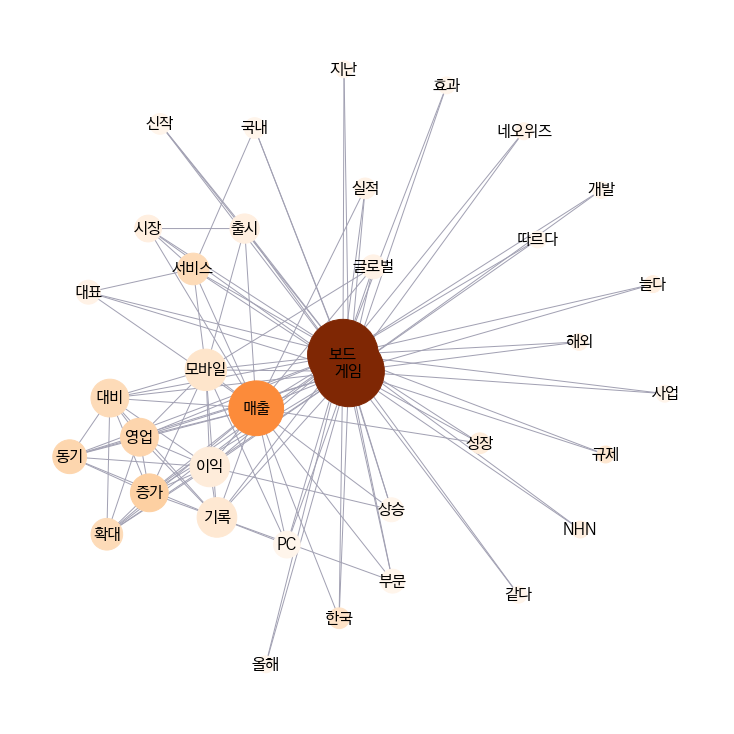

In [140]:
plt.figure(figsize=(10, 10))

nx.draw(G, font_family = 'KoPubDotum', font_size = 16,
        node_size = sizes, node_color = list(pgr.values()), cmap=plt.cm.Oranges,   # pgr weight에 따라 노드 색상 다르게
        pos = nx.spring_layout(G, k = 3.5, iterations = 100), **options)
        
ax = plt.gca()
# ax.collections[0].set_edgecolor("#0f03ff")   # 노드 테두리 색
plt.show()